In [183]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
from matplotlib import pyplot as plt
from preprocessing import process_handwriting, data_import_handwriting
import numpy as np
from tensorflow.math import confusion_matrix


In [184]:
data_path = "./CS671-DLA-Assignment4-Data-2022/Handwriting_Data"
x_train, y_train, x_test, y_test = data_import_handwriting(data_path)
# print(x_train[3].shape)
x_max=np.nan
# x_train, x_max = padding_sequences(x_train)
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)
# print(y_train)
# x_test = padding_sequences(x_test)


In [185]:
x_train[100]

array([[0.15789411, 0.5416664 ],
       [0.13158041, 0.5416664 ],
       [0.10526274, 0.5416664 ],
       [0.07894904, 0.5416664 ],
       [0.02631767, 0.58332966],
       [0.        , 0.66666247],
       [0.05263137, 0.74999528],
       [0.10526274, 0.79166483],
       [0.21052548, 0.83333438],
       [0.26315685, 0.83333438],
       [0.26315685, 0.66666247],
       [0.21052548, 0.5416664 ],
       [0.15789411, 0.37500079],
       [0.13158041, 0.20833517],
       [0.10526274, 0.08333281],
       [0.13158041, 0.04166955],
       [0.18421178, 0.        ],
       [0.26315685, 0.04166955],
       [0.28947452, 0.08333281],
       [0.31578822, 0.12500236],
       [0.34210589, 0.16666562],
       [0.36841959, 0.20833517],
       [0.39473726, 0.20833517],
       [0.39473726, 0.16666562],
       [0.44736863, 0.12500236],
       [0.52631767, 0.08333281],
       [0.57894904, 0.12500236],
       [0.60526274, 0.20833517],
       [0.63158041, 0.41666405],
       [0.63158041, 0.58332966],
       [0.

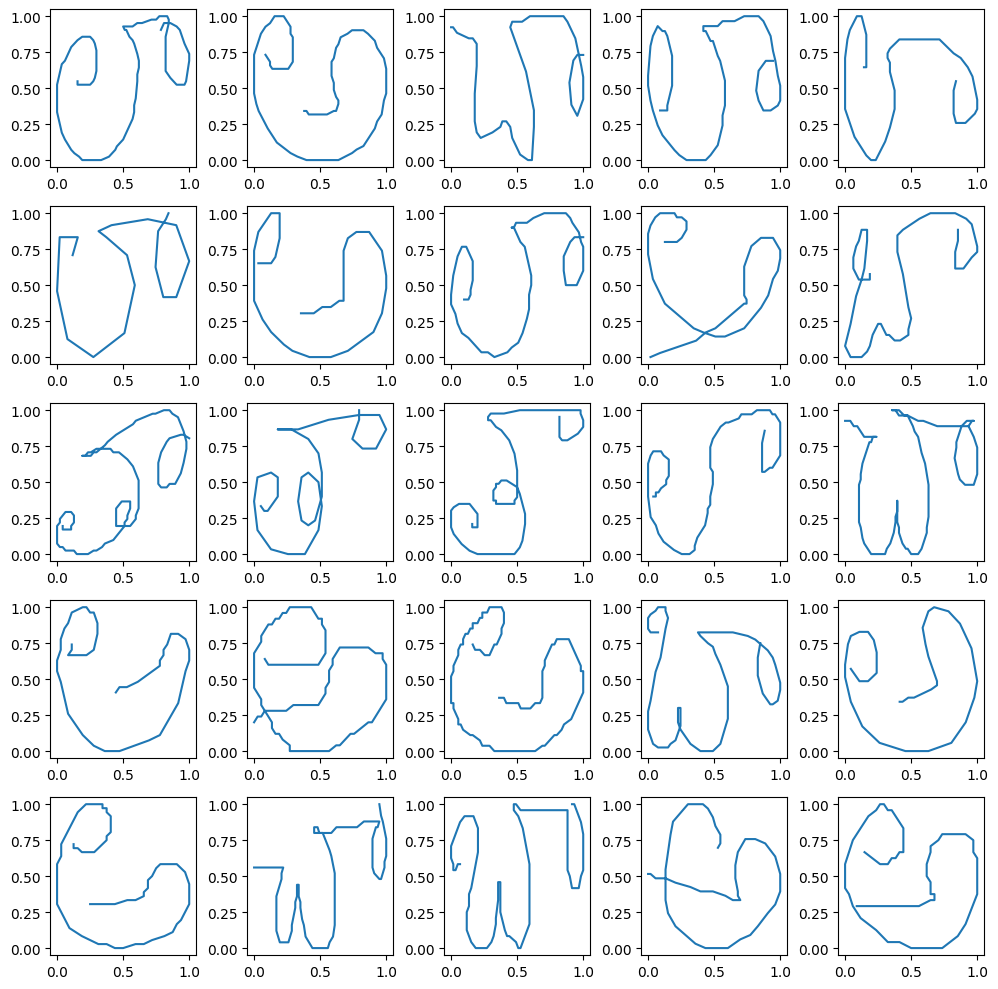

In [186]:
import matplotlib.pyplot as plt
rand_idx = np.random.randint(0,344,(25,))
plt.figure(figsize=(10,10))
for i, idx in enumerate(rand_idx):
    plt.subplot(5,5,i+1)
    plt.plot(x_train[idx][:, 0], x_train[idx][:, 1])
plt.tight_layout()
plt.show()

In [187]:
# x_train[0]

# RNN-Architechture1

In [188]:
rnn = load_model("./models/handwriting_rnn1.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 200, 2)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 40        
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


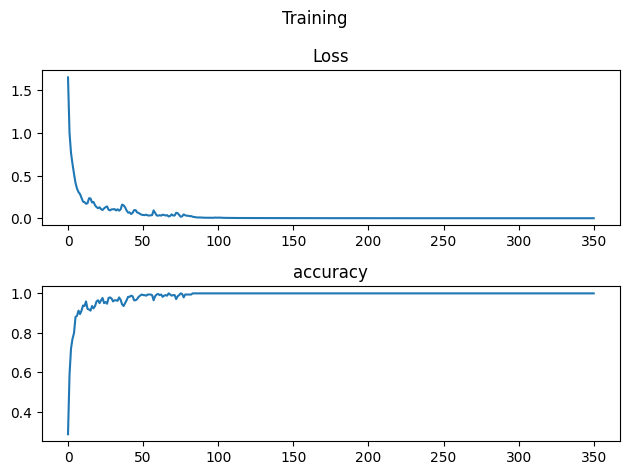

In [211]:
with open("./logs/hist_handrnn1.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [190]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [191]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 3ms/step
[[69  0  0  0  0]
 [ 0  0 24 11 32]
 [ 0  0 47  5 18]
 [ 0  0 24  8 36]
 [ 0  0 12  6 51]]


In [192]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 4ms/step - loss: 1.0271 - accuracy: 0.5102


[1.0271296501159668, 0.5102040767669678]

In [193]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0244 - accuracy: 0.5100


[1.0244338512420654, 0.5099999904632568]

In [194]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 3ms/step
[[20  0  0  0  0]
 [ 0  0  5  4 11]
 [ 0  0 12  3  5]
 [ 0  0  6  1 13]
 [ 0  0  2  0 18]]


# RNN-Architechture2

In [195]:
rnn = load_model("./models/handwriting_rnn2.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 2)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 10)          130       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


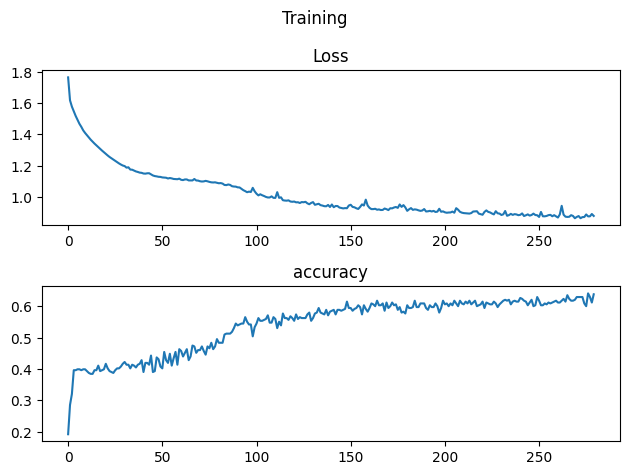

In [196]:
with open("./logs/hist_handrnn2.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [197]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [198]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 5ms/step
[[69  0  0  0  0]
 [ 0  6 43 11  7]
 [ 0  4 54 12  0]
 [ 0  1 24 35  8]
 [ 0  2 12  2 53]]


In [199]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 5ms/step - loss: 0.8710 - accuracy: 0.6327


[0.8709826469421387, 0.6326530575752258]

In [200]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.8373 - accuracy: 0.6400


[0.8372974395751953, 0.6399999856948853]

In [201]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 5ms/step
[[20  0  0  0  0]
 [ 0  0 12  2  6]
 [ 0  0 17  1  2]
 [ 0  1  9 10  0]
 [ 0  2  1  0 17]]


# RNN-Architechture3

In [202]:
rnn = load_model("./models/handwriting_rnn3.h5")
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 2)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                130       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


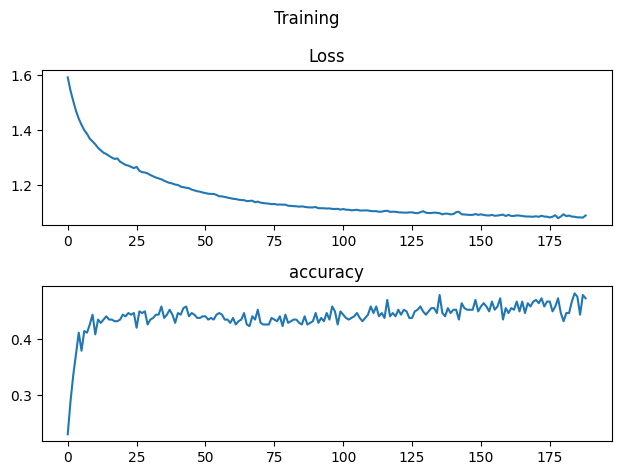

In [203]:
with open("./logs/hist_handrnn3.pkl", mode="rb") as file:
    hist = pickle.load(file)
plt.subplot(2,1,1)
plt.plot(hist["loss"])
plt.title("Loss")

plt.subplot(2,1,2)
plt.plot(hist["accuracy"])
plt.title("accuracy")
plt.suptitle("Training")
plt.tight_layout()

In [204]:

mask_val=-1
x_train_padded = tf.keras.utils.pad_sequences(x_train, dtype=np.float64, padding="post", value=mask_val, maxlen=200)
x_test_padded = tf.keras.utils.pad_sequences(x_test, dtype=np.float64, padding="post", value=mask_val, maxlen=200)

In [205]:
y_pdfs = rnn.predict(x_train_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_train, y_pred).numpy())

11/11 [==============================] - 0s 3ms/step
[[69  0  0  0  0]
 [ 0 29 12  2 24]
 [ 0 26 18  2 24]
 [ 2 27  7  1 31]
 [ 0 12 12  1 44]]


In [206]:
rnn.evaluate(x_train_padded, y_train)

11/11 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.4694


[1.080536961555481, 0.4693877696990967]

In [207]:
rnn.evaluate(x_test_padded, y_test)


4/4 [==============================] - 0s 3ms/step - loss: 1.0874 - accuracy: 0.4900


[1.0873942375183105, 0.49000000953674316]

In [208]:
y_pdfs = rnn.predict(x_test_padded)
y_pred = tf.argmax(y_pdfs, axis=1)
print(confusion_matrix(y_test, y_pred).numpy())

4/4 [==============================] - 0s 3ms/step
[[20  0  0  0  0]
 [ 0  8  3  0  9]
 [ 0  8  5  0  7]
 [ 0  7  3  2  8]
 [ 0  3  3  0 14]]
